<a href="https://colab.research.google.com/github/tapiwajemwa/pneumonia_detection/blob/main/Artificial_Intelligence_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#The first artificial intelligence project

# Munashe Matekenya R195802W
# Tafadzwa Choga R195762J
# Tapiwa Jemwa R195818Y

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
from tensorflow import keras

In [52]:
from keras.layers import Input, Lambda, Dense, Flatten
import pandas as pd
import os
import cv2
import seaborn as sns
import tensorflow as tf
import sklearn

In [4]:
from keras.models import Model
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

# Data collection

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [47]:
IMAGE_SIZE = [224, 224]
data_path = '/content/drive/MyDrive/chest_xray/'

train_path = '/content/drive/MyDrive/chest_xray/train/'
test_path = '/content/drive/MyDrive/chest_xray/test/'
val_path = '/content/drive/MyDrive/chest_xray/val/'


In [33]:
def read_data(data_paths):
    for data_path in data_paths:
        labels = ['PNEUMONIA', 'NORMAL']
        images = []
        y = []
        for label in labels:
            curr_path = data_path + label
            for img in os.listdir(curr_path):
                if ('DS' not in img):
                    image_path = os.path.join(curr_path, img)
                    image =  cv2.resize(cv2.imread(image_path), (img_size, img_size))
                    if image is not None:
                        images.append([image, label])
                
    images = np.asarray(images)
    return images
img_size = 200

In [34]:
train = read_data([train_path])
test = read_data([val_path, test_path])

In [35]:
train_df = pd.DataFrame(train, columns=['image', 'label'])
test_df = pd.DataFrame(test, columns = ['image', 'label'])

In [7]:
vgg = VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)
for layer in vgg.layers:
    layer.trainable = False

folders = glob('/content/drive/MyDrive/chest_xray/train/*')
x = Flatten()(vgg.output)

58900480/58889256 [==============================] - 1s 0us/step


In [8]:
prediction = Dense(len(folders), activation='softmax')(x)
#model object
model = Model(inputs=vgg.input, outputs=prediction)
# model structure
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

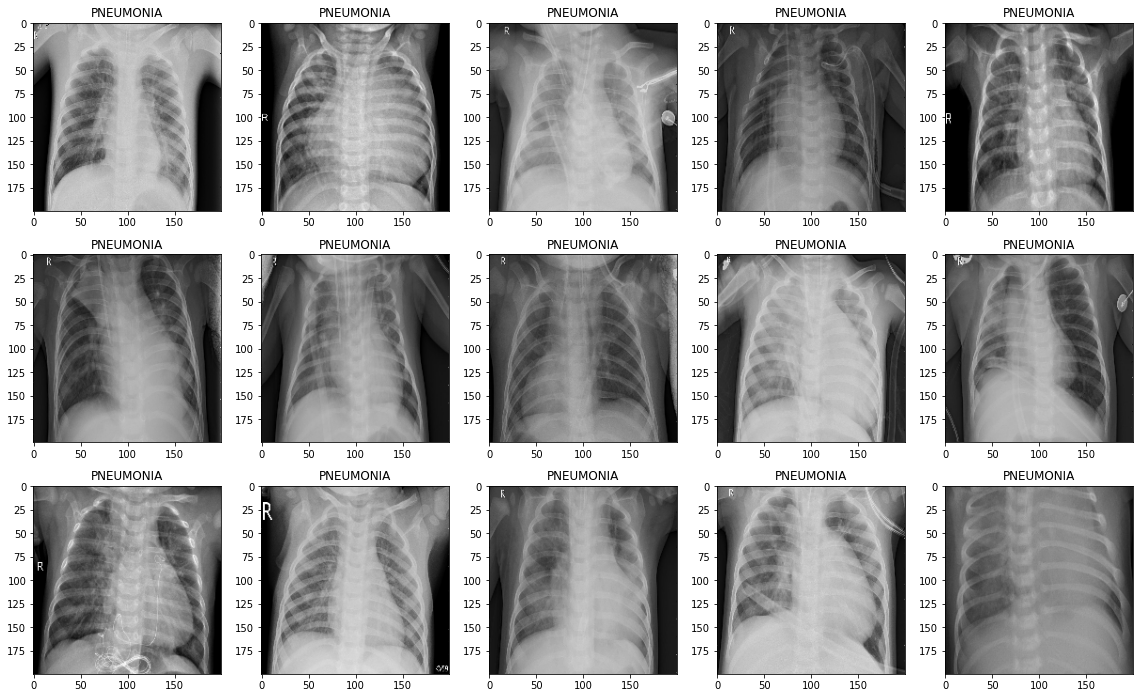

In [ ]:
def Show_example_image():
    fig = plt.figure(figsize = (16, 16))
    for idx in range(15):
        plt.subplot(5, 5, idx+1)
        plt.imshow(train_df.iloc[idx]['image'])
        plt.title("{}".format(train_df.iloc[idx]['label']))
        
    plt.tight_layout()
    
Show_example_image()

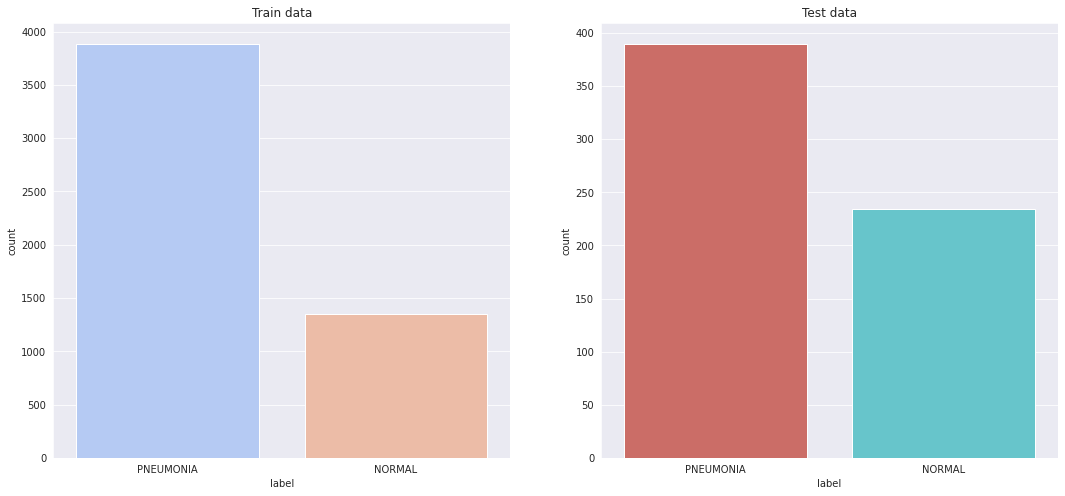

In [ ]:
import seaborn as sns
plt.figure(figsize=(18, 8))
sns.set_style("darkgrid")

plt.subplot(1,2,1)
sns.countplot(train_df['label'], palette = 'coolwarm')
plt.title('Train data')

plt.subplot(1,2,2)
sns.countplot(test_df['label'], palette = "hls")
plt.title('Test data')

plt.show()

# Preprocessing of data

In [9]:
from keras.preprocessing.image import ImageDataGenerator

In [10]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)




training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/chest_xray/train',
                                                 target_size = (224, 224),
                                                 batch_size = 10,
                                                 class_mode = 'categorical')




test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/chest_xray/test',
                                            target_size = (224, 224),
                                            batch_size = 10,
                                            class_mode = 'categorical')

Found 5235 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


In [11]:
from keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
callbacks1 = [ 
    EarlyStopping(monitor = 'loss', patience = 6), 
    ReduceLROnPlateau(monitor = 'loss', patience = 3), 
    ModelCheckpoint('./model.best1.hdf5',monitor='loss', save_best_only=True) # saving the best model
]

In [12]:
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

# Training the model

In [13]:
model_history =model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=10,
  steps_per_epoch=50,
  validation_steps=len(test_set),
)

Epoch 1/10
50/50 [==============================] - 618s 12s/step - loss: 0.4800 - accuracy: 0.8035 - val_loss: 0.3732 - val_accuracy: 0.8622
Epoch 2/10
50/50 [==============================] - 594s 12s/step - loss: 0.2192 - accuracy: 0.9155 - val_loss: 0.3350 - val_accuracy: 0.8798
Epoch 3/10
50/50 [==============================] - 606s 12s/step - loss: 0.1791 - accuracy: 0.9234 - val_loss: 1.0763 - val_accuracy: 0.7099
Epoch 4/10
50/50 [==============================] - 608s 12s/step - loss: 0.3238 - accuracy: 0.8809 - val_loss: 0.3868 - val_accuracy: 0.8894
Epoch 5/10
50/50 [==============================] - 607s 12s/step - loss: 0.2683 - accuracy: 0.9141 - val_loss: 0.4193 - val_accuracy: 0.8830
Epoch 6/10
50/50 [==============================] - 620s 13s/step - loss: 0.1483 - accuracy: 0.9557 - val_loss: 0.9756 - val_accuracy: 0.7612
Epoch 7/10
50/50 [==============================] - 608s 12s/step - loss: 0.1683 - accuracy: 0.9423 - val_loss: 0.3328 - val_accuracy: 0.8974
Epoch 

In [ ]:
model.save('chest_xray_detector.h5')

In [18]:
from sklearn import metrics


# Predictions

In [19]:
#PREDICTIONS
prediction = model.predict(test_set)

In [26]:
def draw_learning_curve(history, keys=['accuracy', 'loss']):
    plt.figure(figsize=(20,8))
    for i, key in enumerate(keys):
        plt.subplot(1, 2, i + 1)
        sns.lineplot(x = history.epoch, y = history.history[key])
        sns.lineplot(x = history.epoch, y = history.history['val_' + key])
        plt.title('Learning Curve')
        plt.ylabel(key.title())
        plt.xlabel('Epoch')
#         plt.ylim(ylim)
        plt.legend(['train', 'test'], loc='best')
    plt.show()

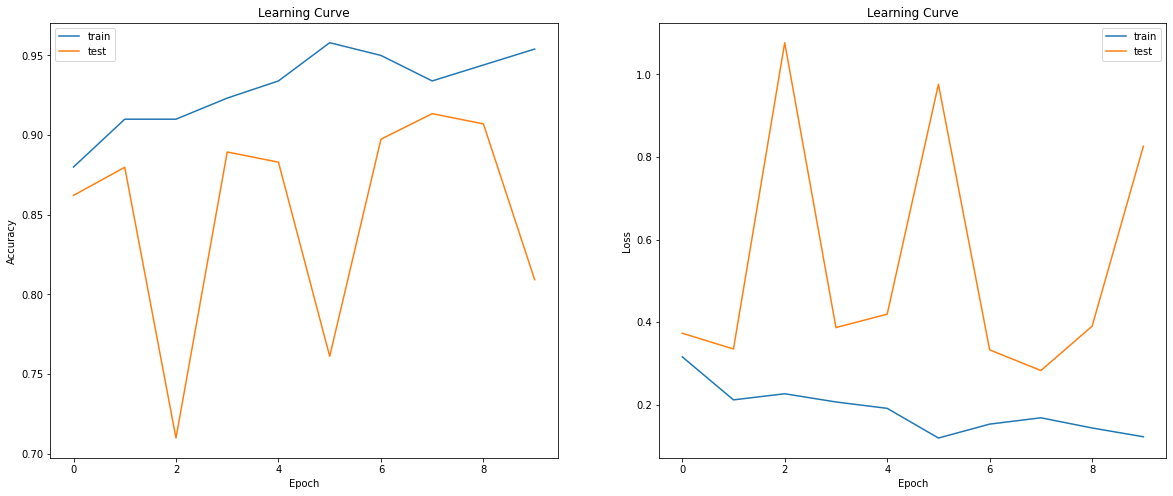

In [27]:
draw_learning_curve(model_history)

#Model evaluation

In [38]:
score = model.evaluate(test_set, verbose = 0)
print('Test loss: {}%'.format(score[0] * 100))
print('Test accuracy: {}%'.format(score[1] * 100))

print("MLP Error: %.2f%%" % (100 - score[1] * 100))

Test loss: 82.58628845214844%
Test accuracy: 80.92948794364929%
MLP Error: 19.07%


# Optimization metrics

In [43]:
training_datagen = ImageDataGenerator(
    preprocessing_function=tf.keras.applications.vgg16.preprocess_input,
    rescale = 1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)
validation_datagen = ImageDataGenerator(
    rescale = 1./255
)

test_datagen = ImageDataGenerator(
    rescale = 1./255
)


In [48]:
train_generator = training_datagen.flow_from_directory(
    train_path,
    target_size=(150,150),
    class_mode='categorical'
)

validation_generator = validation_datagen.flow_from_directory(
    test_path,
    target_size=(150,150),
    class_mode='categorical'
)

test_generator = test_datagen.flow_from_directory(
    valid_path,
    target_size=(150,150),
    class_mode='categorical',
    shuffle=False
)

Found 5235 images belonging to 2 classes.
Found 624 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


In [49]:
train_shape = train_generator.image_shape

tf.keras.backend.clear_session()

base_model = tf.keras.applications.VGG16(weights='imagenet', include_top=False, input_shape=train_shape)

x = base_model.output
x = tf.keras.layers.Flatten()(x)
x = tf.keras.layers.Dense(64, activation='relu')(x)
x = tf.keras.layers.Dropout(0.33)(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Dense(2, 'softmax')(x)

model = tf.keras.Model(inputs=base_model.input, outputs=x)

In [50]:
for layer in base_model.layers:
  layer.trainable = False

optimizer = tf.keras.optimizers.RMSprop(learning_rate=0.0001) # Lower learning rate by x10

model.compile(loss='categorical_crossentropy',     
              optimizer=optimizer, 
              metrics=['accuracy'])

# Callbacks stuff
# Function to save the weights of the model after each epoch
checkpoint = tf.keras.callbacks.ModelCheckpoint(
    '/content/data/model/weights.epoch_{epoch:02d}.hdf5',
    monitor='val_accuracy',
    save_best_only=False,
    save_weights_only=False,
    mode='auto',
    verbose=1
)

In [57]:
#stop training early if there's no improvement
early_stopping_monitor = tf.keras.callbacks.EarlyStopping(patience = 3, monitor = "val_loss", mode="auto", verbose = 1)

lr_reduce = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.3, patience=2, verbose=1, mode='max')

classweight = sklearn.utils.class_weight.compute_class_weight('balanced', np.unique(train_generator.labels), train_generator.labels)
print(classweight)

batch_size = 128
epochs = 2

step_size_train = train_generator.n // train_generator.batch_size
step_size_valid = validation_generator.n // validation_generator.batch_size




[1.94176558 0.67339851]


In [58]:
# Training process
history = model.fit_generator(
    generator=train_generator, 
    steps_per_epoch=step_size_train, 
    epochs=epochs,
    callbacks=[checkpoint],
    validation_data=validation_generator, 
    verbose = 1
)

Epoch 1/2
163/163 [==============================] - 1391s 9s/step - loss: 0.3422 - accuracy: 0.8824 - val_loss: 0.3604 - val_accuracy: 0.8942

Epoch 00001: saving model to /content/data/model/weights.epoch_01.hdf5
Epoch 2/2
163/163 [==============================] - 1392s 9s/step - loss: 0.2360 - accuracy: 0.9273 - val_loss: 0.2718 - val_accuracy: 0.9022

Epoch 00002: saving model to /content/data/model/weights.epoch_02.hdf5


In [66]:
second_prediction  = base_model.predict(test_set)

In [71]:
second_prediction

array([[[[0.5029125 , 0.        , 0.        , ..., 0.        ,
          0.7561853 , 0.        ],
         [0.4112149 , 0.        , 0.        , ..., 0.        ,
          0.83806264, 0.        ],
         [0.19450773, 0.        , 0.37257802, ..., 0.10934551,
          0.81640166, 0.        ],
         ...,
         [0.3530486 , 0.        , 0.04897523, ..., 0.        ,
          0.81044793, 0.        ],
         [0.4041624 , 0.        , 0.        , ..., 0.        ,
          0.61759204, 0.        ],
         [0.13373514, 0.        , 0.        , ..., 0.        ,
          0.633535  , 0.        ]],

        [[0.5172293 , 0.        , 0.        , ..., 0.        ,
          0.96891594, 0.        ],
         [0.50902766, 0.        , 0.        , ..., 0.        ,
          0.7553723 , 0.        ],
         [0.35213053, 0.        , 0.30809897, ..., 0.1943483 ,
          0.69828546, 0.        ],
         ...,
         [0.46516117, 0.        , 0.13258201, ..., 0.        ,
          0.43174076, 0. 

In [73]:
base_model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

# Deployment: 

## Heroku:    https://pneumoniadetectorproject.herokuapp.com/

## Github:    https://pneumoniadetectorproject.herokuapp.com/

## Drive:     https://drive.google.com/drive/folders/1uO7-E0U6DPn9z9Mi_fThkxlKVKTa_Ckh?usp=sharing

## Video:     